# Analysis of VICE's content strategy

### Imports and Setup

In [1352]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import nltk
from nltk.corpus import stopwords

In [1353]:
df = pd.read_csv('data.csv')

In [1354]:
df.head(2)

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category
0,VICE News,vicenews,2.360000e+14,MEDIA_NEWS_COMPANY,US,VICE News Tonight airs Monday–Thursday at 11 P...,2014-02-23 19:00:02 EST,3339049,4342864.0,2021-05-26 04:00:18 EDT,...,https://www.facebook.com/235852889908002/posts...,Tattoos are stigmatized in Japan because they'...,https://www.facebook.com/vicenews/videos/81709...,NaN,NaN,Inside the Underground Pilgrimage That Celebra...,NaN,NaN,NaN,NaN
1,VICE News,vicenews,2.360000e+14,MEDIA_NEWS_COMPANY,US,VICE News Tonight airs Monday–Thursday at 11 P...,2014-02-23 19:00:02 EST,3339049,4342864.0,2021-05-26 00:00:35 EDT,...,https://www.facebook.com/235852889908002/posts...,Battle lines are currently being drawn between...,https://www.facebook.com/vicenews/videos/49396...,NaN,NaN,Going Green With Lithium Has Environmentalists...,NaN,NaN,NaN,NaN


In [1355]:
df.groupby(["Page Category",'User Name']).count()

Page Name  Facebook Id  Page Admin Top Country  \
Page Category      User Name                                                   
MEDIA_NEWS_COMPANY VICE            5317         5317                    5317   
                   vicenews        8384         8384                    8384   
                   viceuk          1332         1332                    1332   
TV_CHANNEL         vicetv          3464         3464                    3464   

                              Page Description  Page Created  \
Page Category      User Name                                   
MEDIA_NEWS_COMPANY VICE                   5317          5317   
                   vicenews               8384          8384   
                   viceuk                 1332          1332   
TV_CHANNEL         vicetv                 3464          3464   

                              Likes at Posting  Followers at Posting  \
Page Category      User Name                                           
MEDIA_NEWS_COMPANY VICE                   5317                  5317   
                   vicenews               8384                  8384   
                   viceuk                 1332                  1321   
TV_CHANNEL         vicetv                 3464                  3374   

                              Post Created  Type  Total Interactions  ...  \
Page Category      User Name                                          ...   
MEDIA_NEWS_COMPANY VICE               5317  5317                5317  ...   
                   vicenews           8384  8384                8384  ...   
                   viceuk             1332  1332                1332  ...   
TV_CHANNEL         vicetv             3464  3464                3464  ...   

                               URL  Message  Link  Final Link  Image Text  \
Page Category      User Name                                                
MEDIA_NEWS_COMPANY VICE       5317     5303  5027         499           0   
                   vicenews   8384     8379  8308         509           0   
                   viceuk     1332     1323  1242         122           0   
TV_CHANNEL         vicetv     3464     3461  3457         197           0   

                              Link Text  Description  Sponsor Id  \
Page Category      User Name                                       
MEDIA_NEWS_COMPANY VICE            5025           49          69   
                   vicenews        8296            4           1   
                   viceuk          1241            9          24   
TV_CHANNEL         vicetv          3193           18         109   

                              Sponsor Name  Sponsor Category  
Page Category      User Name                                  
MEDIA_NEWS_COMPANY VICE                 69                69  
                   vicenews              1                 1  
                   viceuk               24                24  
TV_CHANNEL         vicetv              107               107  

[4 rows x 35 columns]

In [1356]:
df = df.drop(["Facebook Id","Page Admin Top Country",'Page Description',"URL","Link","Final Link"],axis=1)


In [1357]:
df["Image Text"].notnull().sum()

0

In [1358]:
df  = df.drop("Image Text",axis=1)

In [1359]:
#object to datetime
df['Page Created'] = pd.to_datetime(df['Page Created'])
df['Post Created'] = pd.to_datetime(df['Post Created'])

In [1360]:
#Additional attributes
df['Month Posted'] = df["Post Created"].apply(lambda x: x.month)
df['Year Posted'] = df["Post Created"].apply(lambda x: x.year)
df['Day Posted'] = df["Post Created"].apply(lambda x: x.day)
df['Hour Posted'] = df["Post Created"].apply(lambda x: x.hour)

# EDA

#### Number of posts per year per page

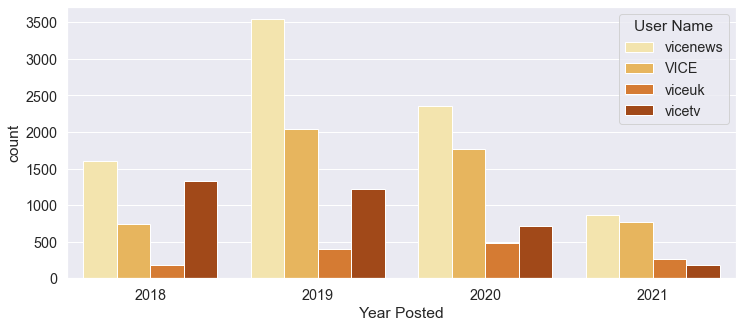

In [1408]:
plt.figure(figsize=(12,5))
sns.countplot(x='Year Posted', hue = 'User Name', data=df, palette = "YlOrBr");


1) We can see a clear trend in the decline of number of videos posted on the vicetv page over the years. 

2) Vice news page holds the greatest upload count over all other pages every year. But the ratio of (Vice news count)/(VICE count) tends towards 1.

3) There seems to be no significant change in the post count for vice UK page.


In [1362]:
#recalculating the column "Total Interactions" to make it an int object
df['Total Interactions'] = df[["Likes","Comments","Shares","Love","Wow","Haha","Sad","Angry","Care"]].sum(axis=1)

In [1363]:
by_month_sum = df.groupby(["Month Posted",'Year Posted']).sum()

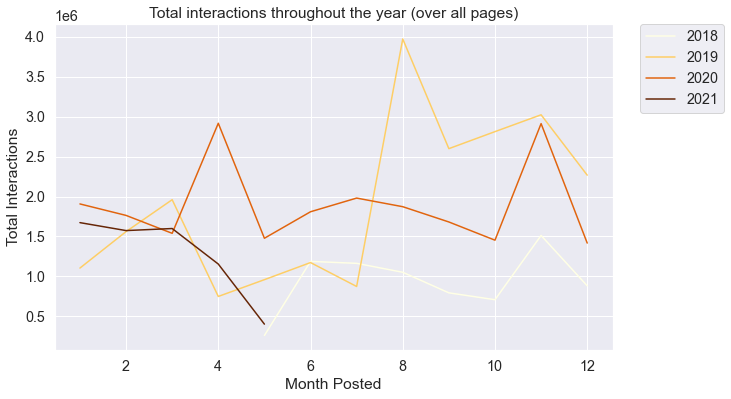

In [1406]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
sns.lineplot(x = 'Month Posted', y = 'Total Interactions',data = by_month_sum, hue="Year Posted",palette="YlOrBr")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total interactions throughout the year (over all pages)');

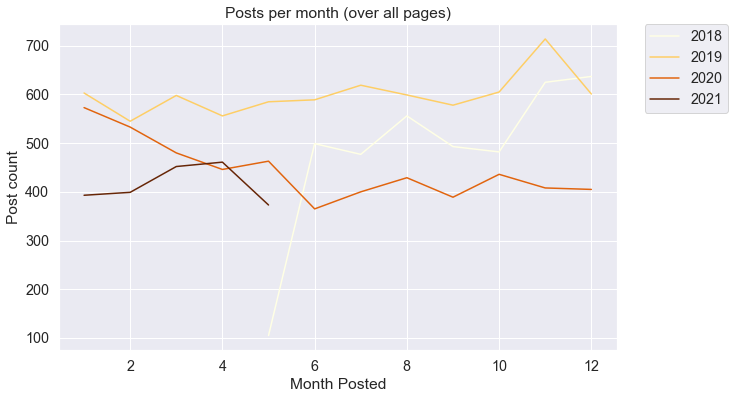

In [1407]:
by_month_count = df.groupby(["Month Posted",'Year Posted']).count()
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
sns.lineplot(x = 'Month Posted', y = 'Total Interactions',data = by_month_count, hue="Year Posted",palette="YlOrBr")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Posts per month (over all pages)')
plt.ylabel("Post count");

**There has been a significant increase in the number of posts per month from mid 2018 untill the end of 2019. The post count has been slowly decreasing ever since early 2020's and has evened out at around 400 posts monthly. On average VICE creates 200 fewer posts each month compared to 2019.**

### Hourly activity

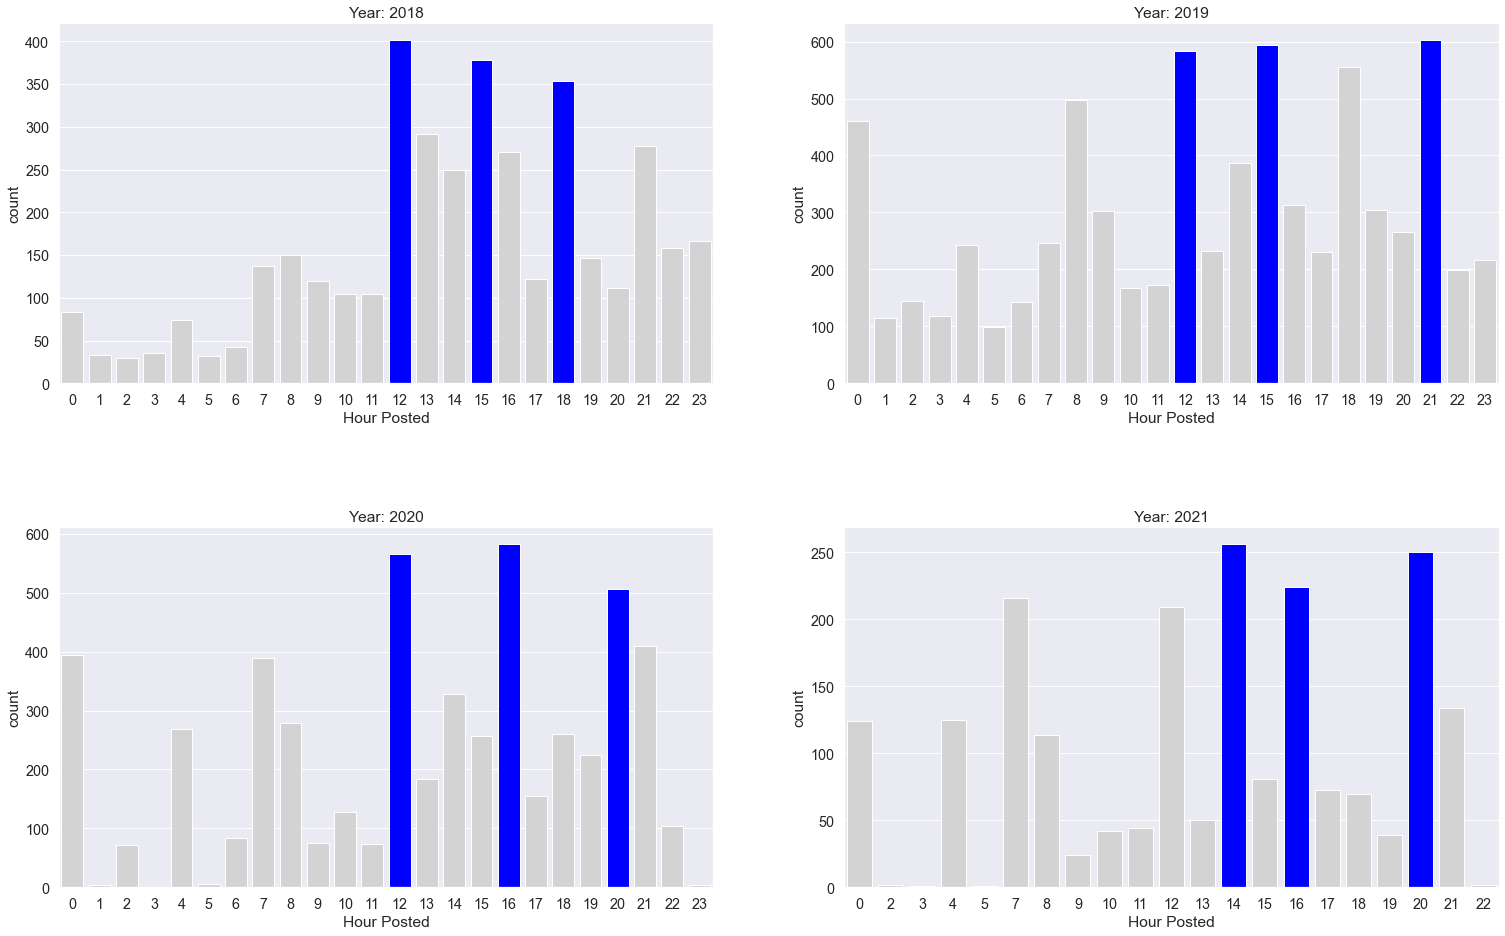

In [1366]:

top2018 = df[df["Year Posted"]==2018].groupby("Hour Posted").count().sort_values(by="Page Name",ascending=False).head(3)['Page Name'].index
top2019 = df[df["Year Posted"]==2019].groupby("Hour Posted").count().sort_values(by="Page Name",ascending=False).head(3)['Page Name'].index
top2020 = df[df["Year Posted"]==2020].groupby("Hour Posted").count().sort_values(by="Page Name",ascending=False).head(3)['Page Name'].index
top2021 = df[df["Year Posted"]==2021].groupby("Hour Posted").count().sort_values(by="Page Name",ascending=False).head(3)['Page Name'].index
temp = [top2018,top2019,top2020,top2021]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(25, 15))



sns.countplot(x="Hour Posted", data=df[df['Year Posted']==2018], ax=ax1)
ax1.set_title('Year: 2018')


sns.countplot(x="Hour Posted", data=df[df['Year Posted']==2019], ax=ax2)
ax2.set_title('Year: 2019')

sns.countplot(x="Hour Posted", data=df[df['Year Posted']==2020], ax=ax3)
ax3.set_title('Year: 2020')

sns.countplot(x="Hour Posted", data=df[df['Year Posted']==2021], ax=ax4)
ax4.set_title('Year: 2021')



plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

i = 0
for ax in [ax1,ax2,ax3,ax4]:
    #print(temp[i])
    for p in ax.patches:
        p.set_facecolor('blue')
        if not(p.get_x()+0.4 in temp[i]):
            p.set_facecolor('lightgrey')
    i +=1
       
for p in ax4.patches:
        #print(p.get_x()+0.4, top2021)
        p.set_facecolor('blue')
        if not(p.get_x()+2.4 in top2021):
            p.set_facecolor('lightgrey')

## Top 3 activity hours for each year:

**2018:** 12:00, 15:00, 18:00

**2019:** 12:00, 15:00, 21:00

**2020:** 12:00, 16:00, 20:00

**2021:** 14:00, 16:00, 20:00


While the top activity hours remained relatively similar, we can see that there have been a few changes to the post schedule over the course of 3+ years. In 2018 the posting time was mainly concentrated around the range from 12:00 to 18:00, the posting schedule has changed in 2021 by mainly focusing on 5 day times: 7:00, 12:00, 14:00, 16:00, and 20:00. The times in between main activity hours seem to have much lower activity compared to all previous years. 

## Day of the week

In [1367]:
df["Day of Week"]  = df["Post Created"].dt.dayofweek
df["Day of Week"] = df["Day of Week"].map({6:"Sun", 0:"Mon", 1:"Tue", 2:"Wed", 3: "Thu", 4: 'Fri', 5:"Sat"})

#### Wednesday and Thursay are the days of the week with greatest post activity across all years. Saturday and Sunday show the lowest activity. 

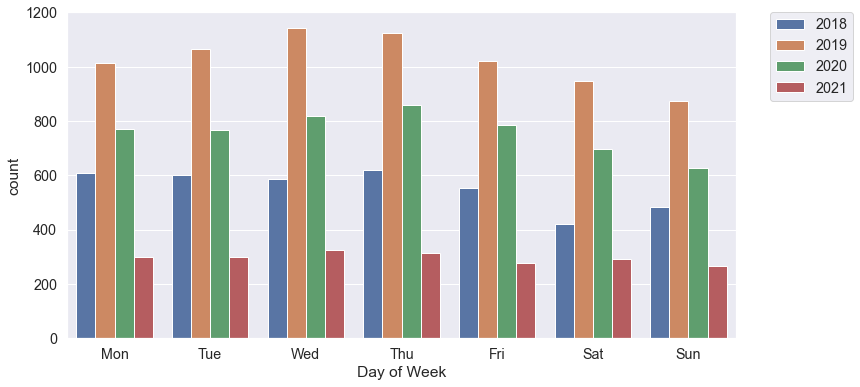

In [1409]:
plt.figure(figsize=(12,6))
sns.countplot(x=df["Day of Week"], hue=df['Year Posted'], order = ["Mon","Tue","Wed","Thu","Fri","Sat", "Sun"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### On average there are 1.3 times more posts created on the weekday with most activity compared to the weekday with the lowest activity. The ratio ranges from 1.2 to 1.47 through 2018-2021. The post distribution is more even in 2021 compared to 2018.

In [1369]:
print("# of posts on a weekday with max activity / # of posts on a weekday with min activity :" + "\n")
for i in range(0,4):
    day_max = df.groupby(["Day of Week", 'Year Posted']).count().unstack(level=1)["Page Name"].iloc[:, i].max()
    day_min = df.groupby(["Day of Week", 'Year Posted']).count().unstack(level=1)["Page Name"].iloc[:, i].min()
    print(df.groupby(["Day of Week", 'Year Posted']).count().unstack(level=1)["Page Name"].columns[i], ":" , day_max/day_min)
    


# of posts on a weekday with max activity / # of posts on a weekday with min activity :

2018 : 1.4703087885985748
2019 : 1.3074285714285714
2020 : 1.3821656050955413
2021 : 1.2134831460674158


## Video Length

In [1370]:
df["Video Length"].isnull().sum()

26

In [1371]:
df = df[df['Video Length'].notna()]

In [1372]:
df["Minutes"] = df["Video Length"].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]) + float(x.split(":")[2])/60)

In [1410]:
#checking
print(df["Minutes"][0])
print(df["Video Length"][0])

17.633333333333333
0:17:38


#### Only 4% of all videos are over 15 minutes long.

In [1374]:

(df[df["Minutes"] > 15].count()["Page Name"])/(df.shape[0])*100

4.4177359103459475

In [1375]:
lengths = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
        

In [1376]:
df["rounded Minutes"] = df["Minutes"].apply(lambda x: find_nearest(lengths,x))
df["Minute Category"] = df['rounded Minutes'].apply(lambda x: x if x != 15 else "15+")

In [1377]:
temp = df.groupby(["Year Posted","Minute Category"]).count().unstack(level=1)["Page Name"]

In [1378]:

temp

Minute Category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15+
Year Posted,,,,,,,,,,,,,,,,
2018,589,663,342,577,487,333,369,142,93,66,21,32,10,13,10,127
2019,503,858,451,1009,1052,796,791,498,330,195,143,117,65,66,34,284
2020,325,600,335,602,677,566,538,345,235,194,149,130,99,103,94,335
2021,142,85,58,180,217,249,196,118,160,129,123,84,80,51,41,165


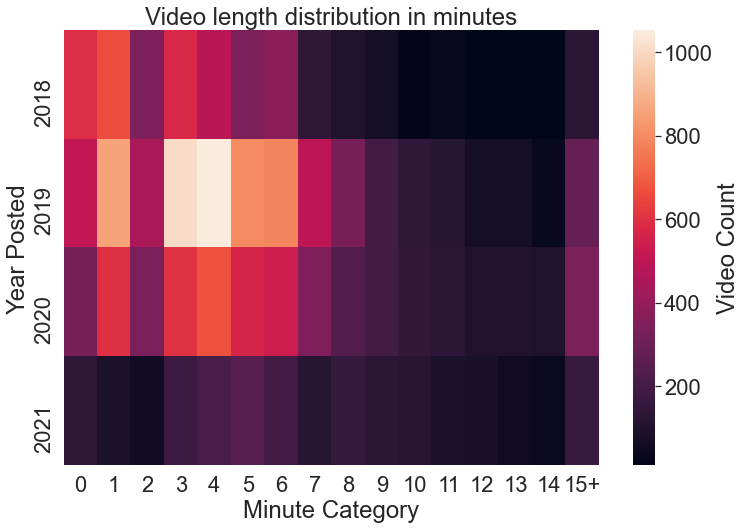

In [1411]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)

sns.heatmap(temp,cbar_kws={'label': 'Video Count'})
plt.title('Video length distribution in minutes');

From the heatmap above we can see that the length of a video is usually in the range of [0,6] minutes. With an increase in 15+ minutes category from 2019 onwards. It looks like the main focus has been the videos of lengths 3-4 minutes and we can see that the distribution is constant throughout the years. The only main difference is the upload count. We can also note the decline in short format videos ( 1 to 2 min) in 2021.

In [1380]:
df['Date Only'] = df['Post Created'].dt.date

In [1381]:
gbd = df[df["User Name"]=="VICE"].groupby(['Date Only',"Year Posted"]).count()

## Video Share Status

In [1382]:
df["Video Share Status"].unique()

array(['crosspost', 'owned', 'share'], dtype=object)

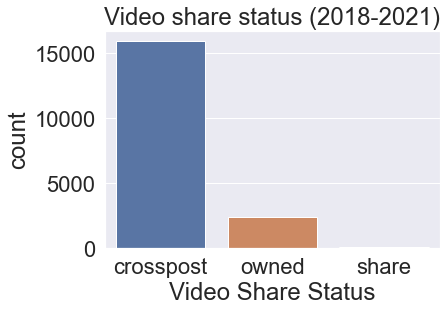

In [1412]:
sns.countplot(x=df["Video Share Status"])
plt.title("Video share status (2018-2021)");

##### 86% of all posts are cross posted.

In [1384]:
100*df.groupby("Video Share Status").count()["Page Name"][0]/(df.groupby("Video Share Status").count()["Page Name"][0]+df.groupby("Video Share Status").count()["Page Name"][1])

86.73807840791692

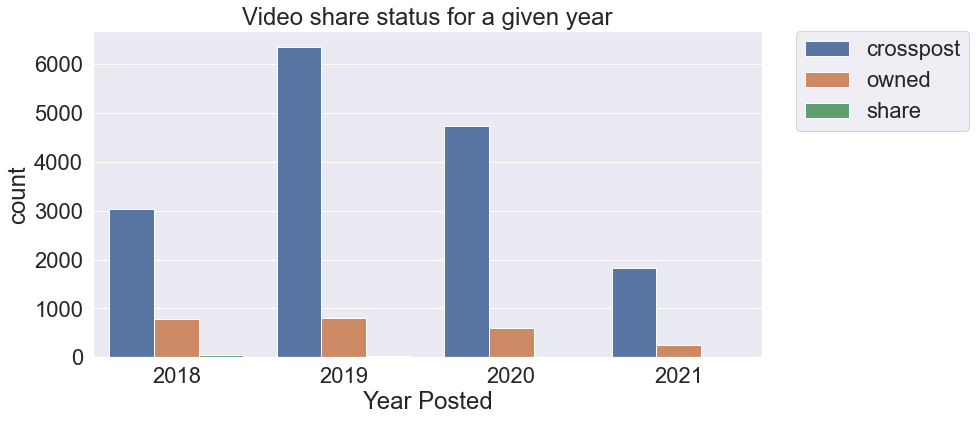

In [1413]:
plt.figure(figsize=(12,6))
sns.countplot(hue=df["Video Share Status"], x=df['Year Posted'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Video share status for a given year");

In [1386]:
gbsy = df.groupby(["Video Share Status", 'Year Posted']).count().unstack(level=1)["Page Name"]


#### The number of crossposts as a percentage of total posts in 2019, 2020, 2021 is greated by around 10% compared to 2018.

In [1387]:
print("Number of Crossposts as a percentage of total posts that year:", "\n")

for i in range(0,4):
    print(gbsy.columns[i], ":" ,(gbsy.iloc[:, i][0]/(gbsy.iloc[:, i][0]+gbsy.iloc[:, i][1]))*100)
   

Number of Crossposts as a percentage of total posts that year: 

2018 : 79.5864956817587
2019 : 88.69977678571429
2020 : 88.7532857679309
2021 : 87.95761078998073


## Is Video Owner?

In [1388]:
df["Is Video Owner?"].unique()

array(['Yes', 'No', '-'], dtype=object)

#### In 2018 the majority of VICE's posts were owned by VICE. During the year of 2019 the number of posts not owned by VICE were almost double the number of original posts. A similar but less extreme trend is present in the following years of 2020 and 2021.

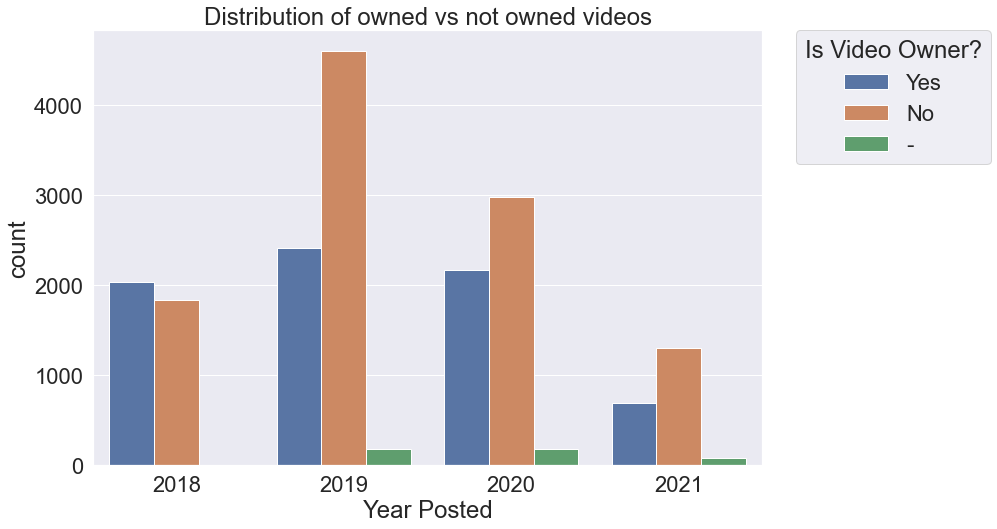

In [1414]:
plt.figure(figsize=(12,8))
sns.countplot(hue="Is Video Owner?", data = df, x='Year Posted')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title="Is Video Owner?")
plt.title("Distribution of owned vs not owned videos");

In [1390]:
df["Link Text"] = df["Link Text"].fillna('')

In [1391]:
df['Link Text List'] = df["Link Text"].apply(lambda x: x.split(' '))

In [1392]:
df['Message'] = df['Message'].fillna('')

# Are all types of engagement beneficial for video popularity?

In [1393]:
engagement_cols = df[["Likes","Comments","Shares","Love","Wow", "Haha","Angry", "Sad","Total Views For All Crossposts","Total Interactions","Post Views"]]

### Correlation between different post metrics

Post views are highly correlated with metrics such as Likes, Shares, and Comments.

''

<Figure size 1440x720 with 0 Axes>

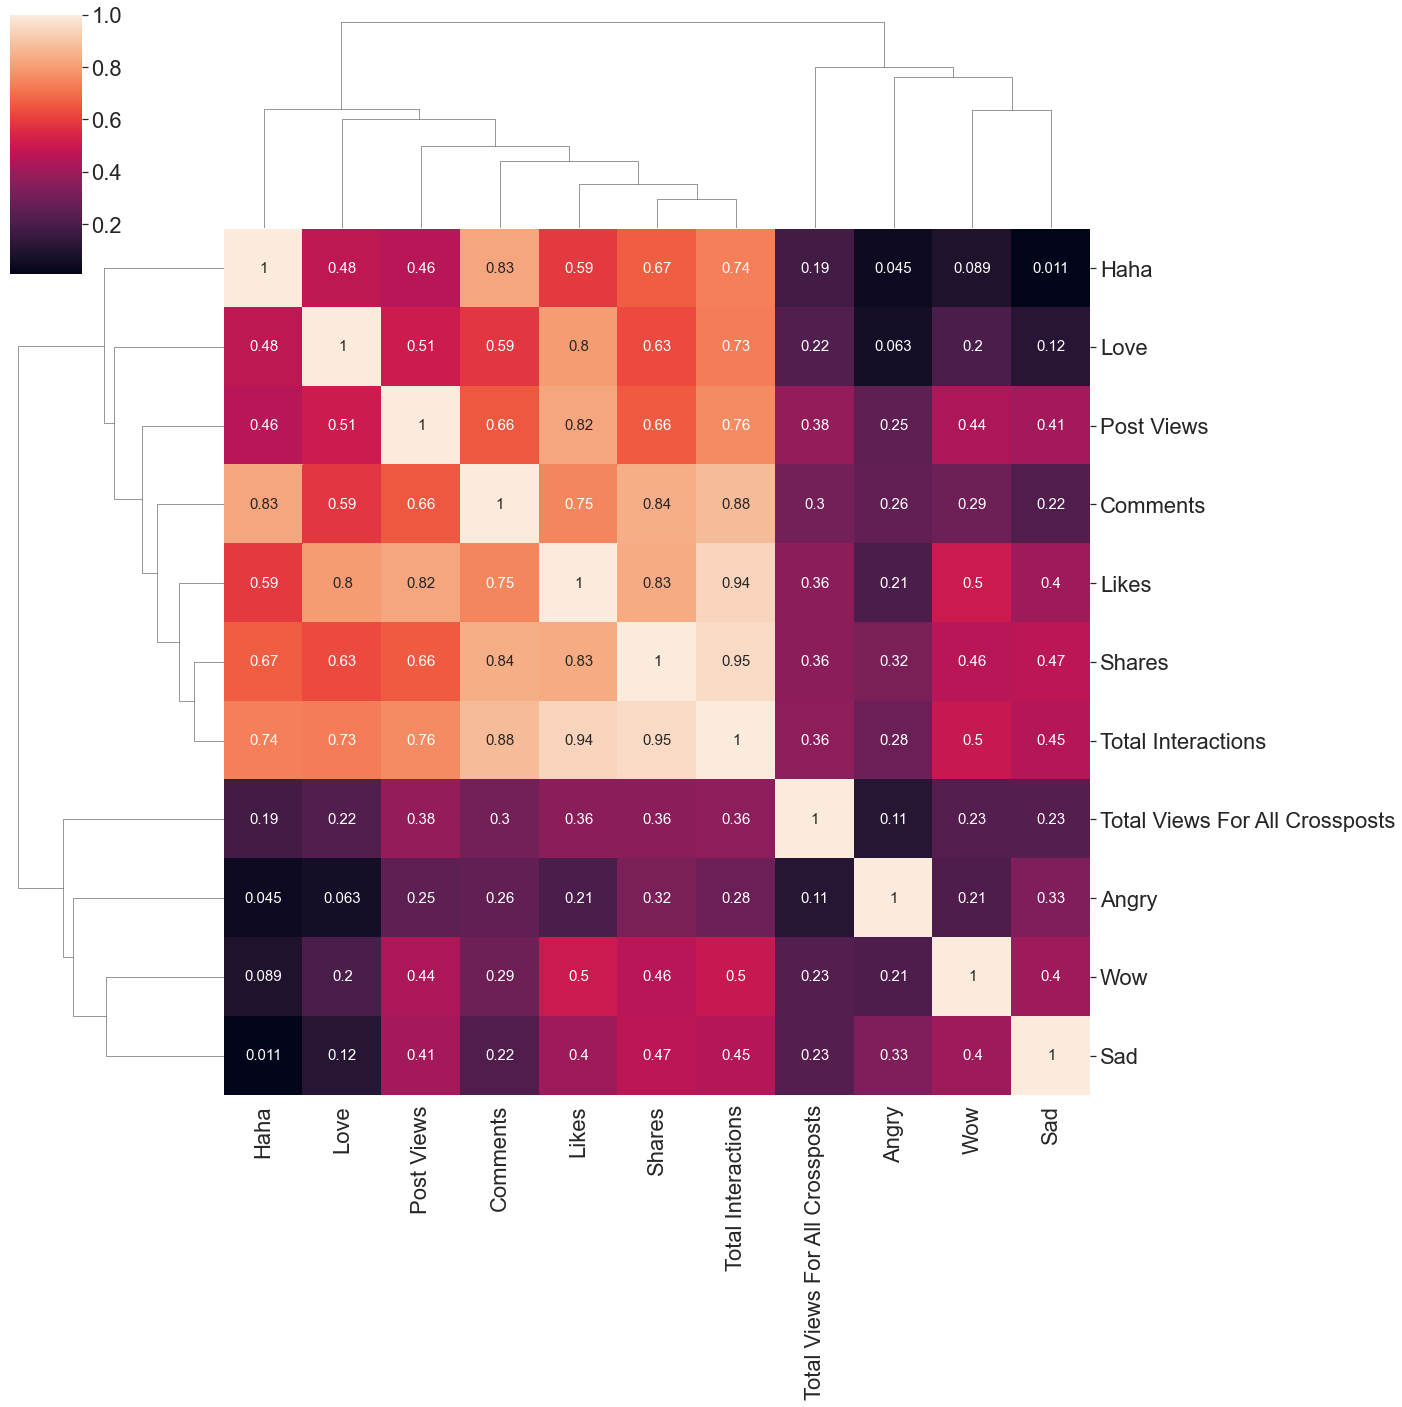

In [1416]:
plt.figure(figsize=(20,10))
sns.clustermap(engagement_cols.corr(),annot=True,annot_kws={"fontsize":15},figsize=(20,20));
#plt.title("Correlation between different post metrics")
;

# Popular Topics

In [1395]:
import string
def remove_punctuation(x):
    
    temp = [c for c in x if c not in string.punctuation]
    return ''.join(temp)

In [1396]:
a = stopwords.words('english')
def remove_stop_words(x):
    temp = x.split()
    temp2 =  [word for word in temp if word.lower() not in a]
    return " ".join(temp2)

#### Removing punctuation and stopwords from "Message" and "Link Text" cols.

In [1397]:
df["Message_no_punc"] = df["Message"].apply(lambda x: remove_punctuation(x))

In [1398]:
df["Message_no_sw"] = df["Message_no_punc"].apply(lambda x: remove_stop_words(x))

In [1399]:
df["Link txt no punc"] = df["Link Text"].apply(lambda x: remove_punctuation(x))

In [1400]:
df["Link txt no sw"] = df["Link txt no punc"].apply(lambda x: remove_stop_words(x))

In [1418]:
 df["Likes"].describe()

count     18471.000000
mean       1254.377998
std        7674.156711
min           0.000000
25%          49.000000
50%         124.000000
75%         391.000000
max      328187.000000
Name: Likes, dtype: float64

In [1402]:
popular_posts = df[df["Likes"]>1300]

### Most frequent key-words found in the titles of posts with 1300+ likes

In [1403]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')

sparse_matrix = word_vectorizer.fit_transform(popular_posts["Link txt no sw"])
frequencies = sum(sparse_matrix).toarray()[0]
ngrams  = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])


ngrams.sort_values(by='frequency',ascending=False).head(10)

,frequency
inside,88
make,68
chainz,56
trump,50
world,44
meet,42
like,38
man,38
kids,37
new,35


### Most frequent phrases found in the titles of posts with 1300+ likes

#### two word phrases

In [1404]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(popular_posts["Link txt no sw"])
frequencies = sum(sparse_matrix).toarray()[0]
ngrams  = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
ngrams.sort_values(by='frequency',ascending=False).head(10)

,frequency
action bronson,20
food icons,16
street food,16
thats delicious,13
10 questions,12
chainz tries,11
one yelps,11
cute kids,11
explosion feel,10
nuclear bomb,10


#### Three word phrases

In [1405]:
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(popular_posts["Link txt no sw"])
frequencies = sum(sparse_matrix).toarray()[0]
ngrams  = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
ngrams.sort_values(by='frequency',ascending=False).head(10)

,frequency
street food icons,16
explosion feel like,10
bomb explosion feel,10
nuclear bomb explosion,10
always wanted ask,9
10 questions always,8
yelps lowest rated,8
questions always wanted,8
fuck thats delicious,8
dark side ring,8
